In [2]:
from pathlib import Path
import yaml
import sys
sys.path.append('../') 

import time as time

import numpy as np
import matplotlib.pyplot as plt
from datasets.real_synthetic_dataset import RealSyntheticDataset

In [4]:
experiment_config_file = "/home/diz-wsl/personal_repos/tfm/configs/experiment_configs/1000s_k3.yaml"
# Definir configuración del experimento
try:
    # Cargar experimento
    experiment_config = yaml.safe_load(open(experiment_config_file, "r"))
    experiment_name = Path(experiment_config_file).name.strip(".yaml")

    # Cargar configuuracion de entrenamiento
    train_config = experiment_config["train"]

    # Cargar configuración del dataset 
    dataset_config = experiment_config["dataset"]
    # Incluir padding idx para indicar el int que representa el padding de los kmer 
    dataset_config["padding_idx"] = (4**dataset_config["k_mers_size"])

    # Cargar configuracion del modelo
    model_config = experiment_config["model"]
    # Numero de indices que representan los kmers (4^N)
    model_config["vocab_size"] = (4**dataset_config["k_mers_size"])+1
except:
    raise FileNotFoundError 

In [5]:
start = time.time()
gen_dataset = RealSyntheticDataset(config = dataset_config)
print(f"Data loaded in {(time.time() - start):.4f} seconds")

H5 cargado desde /home/diz-wsl/personal_repos/tfm/data/ecoli_k12/pod5_1.h5 | Done in 1.0382 secs
Preprocessing done in 27.5547 secs
H5 cargado desde /home/diz-wsl/personal_repos/tfm/data/mm39/fast5.h5 | Done in 2.7640 secs
Preprocessing done in 24.3768 secs
Data loaded in 53.0030 seconds


In [9]:
ecoli_data = gen_dataset.full_dataset[-1]
print(f"Label: {ecoli_data['label']}")

Label: 0


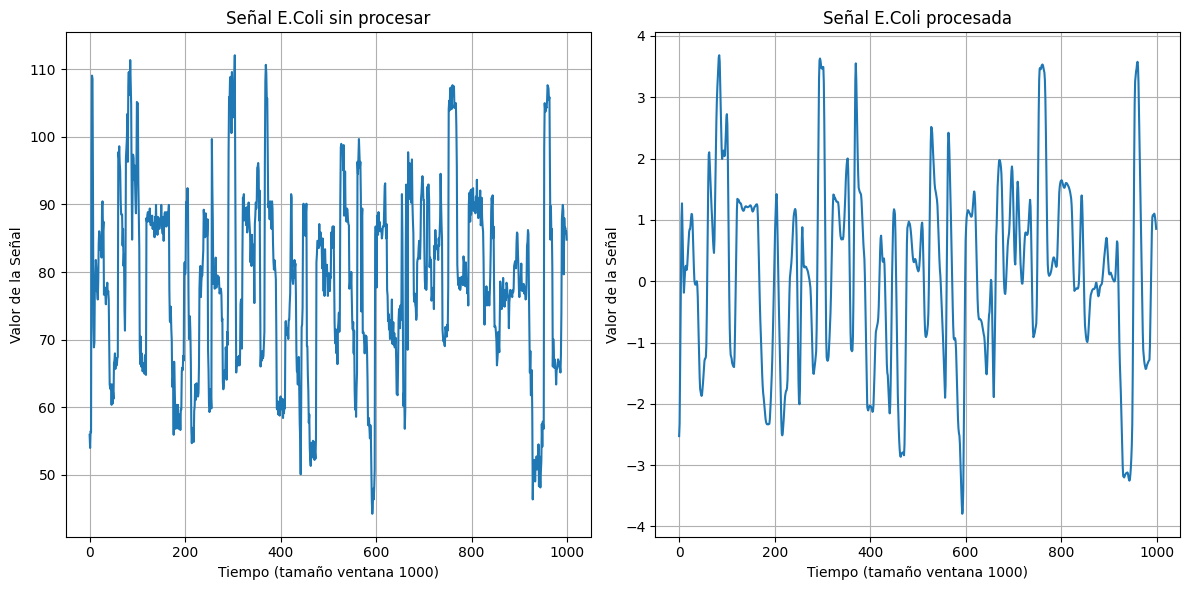

In [14]:
w_idx = 2
w_size = dataset_config["window_size"]
# Crear figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Primera gráfica (señal sin procesar)
segment = [w_idx * w_size, ((w_idx * w_size)+w_size)]
plt.subplot(1, 2, 1)  # (Filas, Columnas, Índice)
plt.plot(ecoli_data["signal_pa"][segment[0]:segment[1]])
plt.title('Señal E.Coli sin procesar')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Segunda gráfica (señal procesada)
plt.subplot(1, 2, 2)
plt.plot(ecoli_data["window_signal"][w_idx])
plt.title('Señal E.Coli procesada')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Mostrar ambas gráficas
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

In [15]:
mm39_data = gen_dataset.full_dataset[0]
print(f"Label: {mm39_data['label']}")

Label: 1


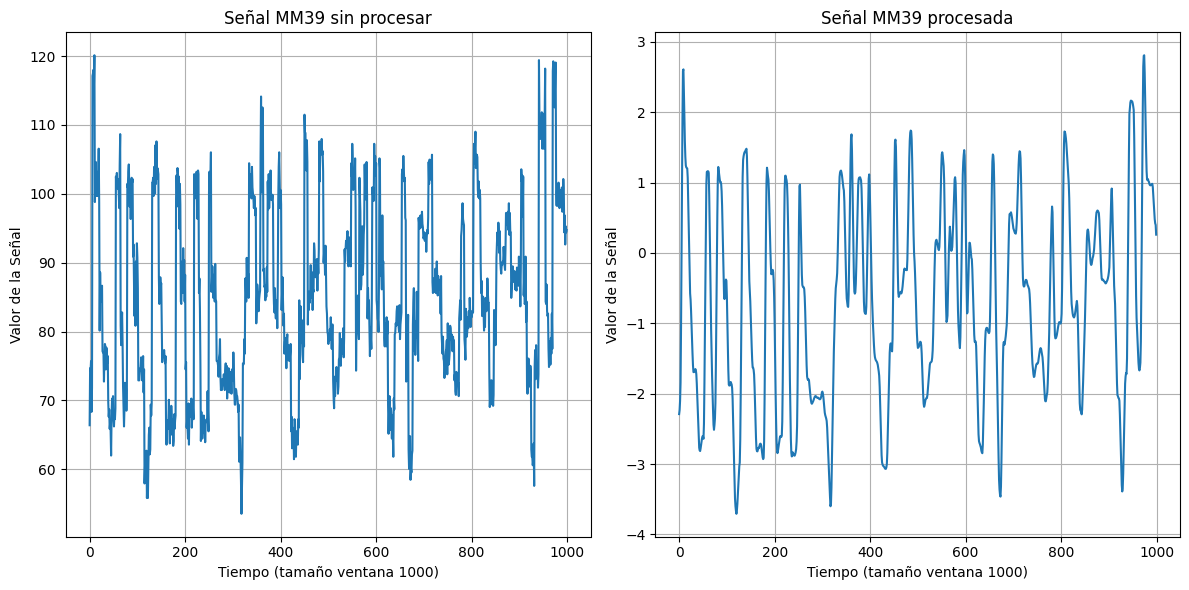

In [17]:
w_idx = 3
w_size = dataset_config["window_size"]
# Crear figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Primera gráfica (señal sin procesar)
segment = [w_idx * w_size, ((w_idx * w_size)+w_size)]
plt.subplot(1, 2, 1)  # (Filas, Columnas, Índice)
plt.plot(mm39_data["signal_pa"][segment[0]:segment[1]])
plt.title('Señal MM39 sin procesar')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Segunda gráfica (señal procesada)
plt.subplot(1, 2, 2)
plt.plot(mm39_data["window_signal"][w_idx])
plt.title('Señal MM39 procesada')
plt.xlabel(f'Tiempo (tamaño ventana {dataset_config["window_size"]})')
plt.ylabel('Valor de la Señal')
plt.grid(True)

# Mostrar ambas gráficas
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()